In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
datos1 = pd.read_csv(r'/home/alejandro/Documents/Octavo/Intermedio/RayosX/Datos1.csv')
datos2 = pd.read_csv(r'/home/alejandro/Documents/Octavo/Intermedio/RayosX/Datos2.csv')
datos3 = pd.read_csv(r'/home/alejandro/Documents/Octavo/Intermedio/RayosX/Datos3.csv')
datos4 = pd.read_csv(r'/home/alejandro/Documents/Octavo/Intermedio/RayosX/Datos4.csv')

In [3]:
datos1.head()

,Rayos X característicos del cobre,LiF,Ángulo (rad),Intensidad (arb),Unnamed: 4,KBr,Ángulo (rad).1,Intensidad (arb).1
0,NaN,NaN,0.052360,0,NaN,NaN,0.052360,0.0
1,NaN,NaN,0.052535,0,NaN,NaN,0.052535,0.0
2,NaN,NaN,0.052709,0,NaN,NaN,0.052709,0.0
3,NaN,NaN,0.052884,0,NaN,NaN,0.052884,0.0
4,NaN,NaN,0.053058,0,NaN,NaN,0.053058,0.0


# Actividad 1

In [4]:
dLiF = 2.014e-10
dKBr = 3.29e-10
AngKBr = []
AngLiF = []
ILi = []
IKBr = []
lamLiF = []
lamKBr = []
for i in range(5430):
    AngLiF.append(datos1.iloc[i,2])
    AngKBr.append(datos1.iloc[i,6])
    ILi.append(datos1.iloc[i,3])
    IKBr.append(datos1.iloc[i,7])
    lamLiF.append(2*dLiF*np.sin(AngLiF[i]))
    lamKBr.append(2*dKBr*np.sin(AngKBr[i]))


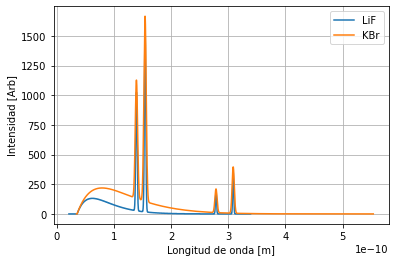

In [5]:
plt.plot(lamLiF,ILi,label = 'LiF')
plt.plot(lamKBr,IKBr, label = 'KBr')
plt.grid()
plt.ylabel('Intensidad [Arb]')
plt.xlabel('Longitud de onda [m]')
plt.legend()

In [6]:
#Calculo de máximo global
k1 = 0
k2 = 0
IMax1 = 0
IMax2 = 0
for i in range(len(lamKBr)):
    if ILi[i]>IMax1:
        IMax1 = ILi[i]
        k1 = i
    if IKBr[i]>IMax2:
        IMax2 = IKBr[i]
        k2 = i
        
print(lamLiF[k1], lamKBr[k2])

1.5431583760156256e-10 1.542548203316478e-10


In [7]:
#Cálculo del primer máximo
k11 = 0
k22 = 0
IMax11 = 0
IMax22 = 0
for i in range(len(lamKBr)):
    if ILi[i]>IMax11:
        IMax11 = ILi[i]
        k11 = i
    if lamLiF[i]>1.5e-10:
        break

for i in range(len(lamLiF)):
    if IKBr[i]>IMax22:
        IMax22 = IKBr[i]
        k22 = i
    if lamKBr[i]>1.5e-10:
        break
    
KalfLiF = lamLiF[k1]
KalfKBr = lamKBr[k2]
KbetaLiF = lamLiF[k11]
KbetaKBr = lamKBr[k22]

PromAlf = (KalfKBr+KalfLiF)/2
PromBe = (KbetaKBr+KbetaLiF)/2
desAlf = (abs(KalfLiF-PromAlf) + abs(KalfKBr-PromAlf))/2
desBe = (abs(KbetaLiF-PromBe) + abs(KbetaKBr-PromBe))/2



print(KalfLiF,KalfKBr)
print(KbetaLiF,KbetaKBr)
print(PromAlf,desAlf)
print(PromBe, desBe)

1.5431583760156256e-10 1.542548203316478e-10
1.3919667754949922e-10 1.3914453977412573e-10
1.542853289666052e-10 3.0508634957378123e-14
1.3917060866181246e-10 2.606888768674559e-14


In [8]:
#Calculo de desviación 
miti1 = IMax1/2
miti2 = IMax2/2
miti11 = IMax11/2
miti22 = IMax22/2

D11 = D12 = D13 = D14 = D21 = D22 = D23 = D24 = 0


l11 = l12 = l13 = l14 = l21 = l22 = l23 = l24 = 100
for i in range(len(lamKBr)):
    if abs(round(miti1) - ILi[i])<l11 and i<k1:
        D11 = lamLiF[i]
    if abs(round(miti1) - ILi[i])<l12 and i>k1:
        D12 = lamLiF[i]
        
    if abs(round(miti11) - ILi[i])<l13 and i<k11:
        D13 = lamLiF[i]
    if abs(round(miti11) - ILi[i])<l14 and i>k11:
        D14 = lamLiF[i]
        
    if abs(round(miti2) - IKBr[i])<l21 and i<k2:
        D21 = lamKBr[i]
    if abs(round(miti2) - IKBr[i])<l22 and i>k2:
        D22 = lamKBr[i]
        
    if abs(round(miti22) - IKBr[i])<l23 and i<k22:
        D23 = lamKBr[i]
    if abs(round(miti22) - IKBr[i])<l24 and i>k22:
        D24 = lamKBr[i]
        
Delta1 = D12 - D11 #incertidumbre Kalfa LiF
Delta11 = D14 - D13 #incertidumbre Kbeta LiF
Delta2 = D22 - D21 #incertidumbre Kalfa KBr
Delta22 = D24 - D23 #incertidumbre Kbeta KBr

Delta = [Delta1,Delta2,Delta11,Delta22] 

In [9]:
Delta

[2.856522903589353e-12,
 5.022627854143828e-12,
 1.8318781350835068e-11,
 2.0813596858440038e-11]

## Incertidumbre de los parámetros de la pendiente


$$y = mx+b$$


$$S = \sum_{i = 1}^k ((y)_i-b-mx_i)^2$$

$$\Delta b = \sqrt{\frac{S}{k-2}\frac{\sum x^2}{{\sum x^2 - \left(\sum x\right)^2}}}$$

$$\Delta m = \sqrt{\frac{S}{k-2}\frac{k}{\sum x^2 - \left(\sum x\right)^2}}$$

# Actividad 2

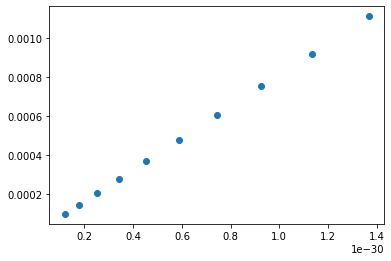

In [10]:
#Datos aluminio
Allam = [4.909E-11,5.606E-11,6.301E-11,6.995E-11,7.686E-11,8.375E-11,9.061E-11,9.745E-11,1.043E-10,1.110E-10]
Allam = np.array(Allam)
Allam3 = Allam**3
AlRho = [0.000096,0.000143,0.000204,0.000278,0.000369,0.000478,0.000605,0.000753,0.000922,0.001114]
plt.scatter(Allam3,AlRho)

In [11]:
#Datos Zinc
Zlam3 = [7.464E-32,1.183E-31,1.762E-31,2.502E-31,3.422E-31,4.540E-31,5.874E-31,7.439E-31,9.253E-31,1.133E-30,1.369E-30]
Zlam3 = np.array(Zlam3)
ZRho = [2.818E-07,4.466E-07,6.653E-07,9.447E-07,1.292E-06,1.714E-06,2.218E-06,2.810E-06,3.494E-06,4.279E-06,5.168E-06]

In [12]:
# incertidumbre pendientes:
S1 = 0
S2 = 0
paramAl = [8.14e26,5.14e-5]
paramZ = [3.78e24,-1.29e-12]
SumCuadAl = 0
SumSingAl = 0 
SumCuadZ = 0 
SumSingZ = 0
k = len(Allam3)
for i in range(k):
    S1 += (AlRho[i]-paramAl[1]-paramAl[0]*Allam3[i])**2
    S2 += (ZRho[i]-paramZ[1]-paramZ[0]*Zlam3[i])**2
    SumSingAl += Allam3[i]
    SumCuadAl += (Allam3[i])**2
    SumSingZ += Zlam3[i]
    SumCuadZ += (Zlam3[i])**2
    

DmAl = np.sqrt(((S1/(k-2))*(k/abs(SumCuadAl - (SumSingAl)**2))))
DmZ = np.sqrt(((S2/(k-2))*(k/abs(SumCuadZ - (SumSingZ)**2))))
print(DmAl,DmZ)

3.240739674259394e+25 1.7016816659993862e+21


In [13]:
DmZ/(30**3)

6.302524688886615e+16

Text(0.5, 1.0, 'Aluminio')

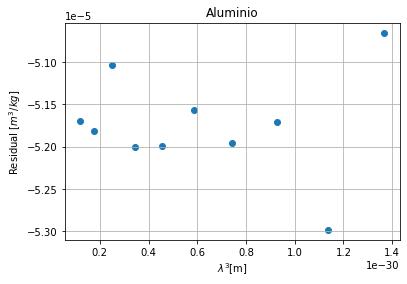

In [14]:
#Residual Aluminio
mAl = 8.14e26
bAl = 5.14e-5

residualAl = []
for i in range(len(Allam3)):
    residualAl.append(AlRho[i]-(Allam3[i]*mAl+bAl))

    

plt.scatter(Allam3,residualAl)
plt.grid()
plt.xlabel(r'$\lambda^3$[m]')
plt.ylabel(r'Residual [$m^3/kg$]')
plt.title('Aluminio')

Text(0.5, 1.0, 'Zinc')

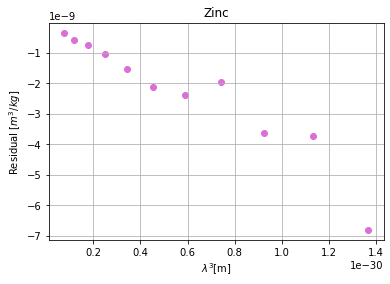

In [15]:
# Residual Zinc
mZ = 3.78e24
bZ = -1.29e-12

residualZ = []
for i in range(len(Zlam3)):
    residualZ.append(ZRho[i]-(Zlam3[i]*mZ + bZ))
    
plt.scatter(Zlam3,residualZ,color = 'orchid')
plt.grid()
plt.xlabel(r'$\lambda^3$[m]')
plt.ylabel(r'Residual [$m^3/kg$]')
plt.title('Zinc')

# Actividad 3

## Incertidumbre de los parámetros de la pendiente


$$y = mx+b$$


$$S = \sum_{i = 1}^k ((y)_i-b-mx_i)^2$$

$$\Delta b = \sqrt{\frac{S}{k-2}\frac{\sum x^2}{{\sum x^2 - \left(\sum x\right)^2}}}$$

$$\Delta m = \sqrt{\frac{S}{k-2}\frac{k}{\sum x^2 - \left(\sum x\right)^2}}$$

In [30]:
## corriente constante

IntBeta1 = [0.6452325,1.7969132,3.2840042,5.0428811,7.0366014,9.2401827,11.6352596,14.2075893,16.9457051,19.8401162,22.8827978,26.0668477,29.3862472,32.8356867,36.4104367,40.1062493,43.9192815,47.8460345,51.8833055,56.0281480,60.2778394,64.6298539,69.0818399,73.6316010,78.2770794]
IntAlfa11 = [1.6009608,4.4585286,8.1483218,12.5124741,17.4593236,22.9268835,28.8695851,35.2520889,42.0459439,49.2276014,56.7771497,64.6774633,72.9136083,81.4724106,90.3421354,99.5122425,108.9731965,118.7163164,128.7336553,139.0179023,149.5623020,160.3605872,171.4069234,182.6958606,194.2222929]
IntAlfa12 = [1.4830179,4.1300685,7.5480344,11.5906794,16.1730941,21.2378585,26.7427609,32.6550653,38.9484166,45.6010009,52.5943735,59.9126705,67.5420582,75.4703330,83.6866246,92.1811694,100.9451343,109.9704779,119.2498388,128.7764447,138.5440378,148.5468127,158.7793646,169.2366450,179.9139244]
V = [32624.106,90855.133,166045.109,254977.060,355783.114,467200.115,588299.473,718361.047,856805.063,1003151.653,1156995.057,1317986.299,1485821.055,1660230.867,1840976.603,2027843.479,2220637.183,2419180.817,2623312.438,2832883.067,3047755.041,3267800.654,3492901.006,3722945.039,3957828.708]

In [31]:
# incertidumbre pendientes:
# Corriente constante 1mA
S1 = 0
S2 = 0
S3 = 0
paramBeta1 = [1.978e-5,1.743e-14]
paramAlfa11 = [4.907e-5,0]
paramAlfa12 = [4.546e-5,-3.486e-14]
SumCuadV = 0
SumSingV = 0
k = len(IntAlfa11)
for i in range(k):
    S1 += (IntBeta1[i]-paramBeta1[1]-paramBeta1[0]*V[i])**2
    S2 += (IntAlfa11[i]-paramAlfa11[1]-paramAlfa11[0]*V[i])**2
    S3 += (IntAlfa12[i]-paramAlfa12[1]-paramAlfa12[0]*V[i])**2
    SumSingV += V[i]
    SumCuadV += (V[i])**2
    

DmBeta1 = np.sqrt(((S1/(k-2))*(k/abs(SumCuadV - (SumSingV)**2))))
DmAlfa11 = np.sqrt(((S2/(k-2))*(k/abs(SumCuadV - (SumSingV)**2))))
DmAlfa12 = np.sqrt(((S3/(k-2))*(k/abs(SumCuadV - (SumSingV)**2))))
print(DmBeta1,DmAlfa11,DmAlfa12)

5.900595470901165e-10 7.828161161083328e-10 6.032578843218787e-10


In [34]:
## Voltaje constante
IntBeta2 = [7.827707937,15.655415875,23.483123812,31.310831749,39.138539687,46.966247624,54.793955561,62.621663499,70.449371436,78.277079373]
IntAlfa21 = [19.422229292,38.844458583,58.266687875,77.688917166,97.111146458,116.533375749,135.955605041,155.377834332,174.800063624,194.222292915]
IntAlfa22 = [17.991392439,35.982784878,53.974177317,71.965569756,89.956962195,107.948354634,125.939747073,143.931139512,161.922531951,179.913924390]
I = [0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001]

In [37]:
# incertidumbre pendientes:
# Voltaje constante 35kV
S1 = 0
S2 = 0
S3 = 0
paramBeta2 = [78277,-3e-14]
paramAlfa21 = [194222,-1e-13]
paramAlfa22 = [179914,-2e-14]
SumCuadI = 0
SumSingI = 0
k = len(IntAlfa21)
for i in range(k):
    S1 += (IntBeta2[i]-paramBeta2[1]-paramBeta2[0]*I[i])**2
    S2 += (IntAlfa21[i]-paramAlfa21[1]-paramAlfa21[0]*I[i])**2
    S3 += (IntAlfa22[i]-paramAlfa22[1]-paramAlfa22[0]*I[i])**2
    SumSingI += I[i]
    SumCuadI += (I[i])**2
    

DmBeta2 = np.sqrt(((S1/(k-2))*(k/abs(SumCuadI - (SumSingI)**2))))
DmAlfa21 = np.sqrt(((S2/(k-2))*(k/abs(SumCuadI - (SumSingI)**2))))
DmAlfa22 = np.sqrt(((S3/(k-2))*(k/abs(SumCuadI - (SumSingI)**2))))
print(DmBeta2,DmAlfa21,DmAlfa22)

0.03388891742665218 0.12506203800286983 0.032282164465975864


## Actividad 4

In [47]:
## 1/U_a vs lam_min

x = [7.6923E-05,6.6667E-05,5.8824E-05,5.2632E-05,4.7619E-05,4.3478E-05,0.00004,3.7037E-05,3.4483E-05,3.2258E-05,3.0303E-05,2.8571E-05]
y = [9.5398363157E-11,8.3058974543E-11,7.3404639394E-11,6.5787717585E-11,5.9537636213E-11,5.3969494818E-11,4.9786524183E-11,4.6296792001E-11,4.2803134142E-11,4.0006088439E-11,3.7906916985E-11,3.5806706288E-11]
param = [1.24102e-6,2.247e-13]
sumX = 0
sumX2 = 0
S = 0
k = len(x)
for i in range(k):
    S += (y[i]-param[1]-param[0]*x[i])**2
    sumX += x[i]
    sumX2 += x[i]**2


Dm = np.sqrt(((S/(k-2))*(k/abs(sumX2 - (sumX)**2))))
Db = np.sqrt(((S/(k-2))*(sumX2/abs(sumX2 - (sumX)**2))))
print(Dm,Db)

1.368330693382464e-09 6.572487729188029e-14


In [46]:
## c/u_a vs e\lambda

x = [23060.9583,19986.1639,17634.8505,15778.5504,14275.8313,13034.4547,11991.6983,11103.4244,10337.671,9670.72445,9084.61994,8565.4988]
y = [1.52828e-29,1.3306e-29,1.17594e-29,1.05392e-29,9.53793e-30,8.64591e-30,7.9758e-30,7.41675e-30,6.85706e-30,6.40898e-30,6.07269e-30,5.73623e-30]
param = [6.63165e-34,4e-32]
sumX = 0
sumX2 = 0
S = 0
k = len(x)
for i in range(k):
    S += (y[i]-param[1]-param[0]*x[i])**2
    sumX += x[i]
    sumX2 += x[i]**2


Dm = np.sqrt(((S/(k-2))*(k/abs(sumX2 - (sumX)**2))))
Db = np.sqrt(((S/(k-2))*(sumX2/abs(sumX2 - (sumX)**2))))
print(Dm,Db)

7.37992642491308e-37 1.0627001850293514e-32
